In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [2]:
import numpy as np

In [3]:
import phenom

In [4]:
from scrinet.interfaces import lalutils

In [5]:
from scrinet.analysis.timeseries import TimeSeries
from scrinet.analysis.frequencyseries import FrequencySeries
from scrinet.analysis import matchedfilter

In [6]:
import tensorflow as tf

# generate waveforms

In [7]:
# distance=1e6*lalutils.lal.PC_SI
distance=1

In [20]:
phase_shift = 0.3
timse_shift = 1.
# timse_shift = 0.

In [21]:
p = lalutils.gen_td_wf_params(m1=30, m2=30, f_min=10, distance=distance)
t, amp, phase = lalutils.gen_td_wf(p, t_min=None, t_max=100)
h = amp * np.exp(-1.j * phase)
hp = np.real(h)
hc = np.imag(h)
# convert time from M to s
t_s = phenom.MtoS(t, p['m1']+p['m2'])
dt = t_s[1] - t_s[0]
signal = TimeSeries(hp, t_s[1]-t_s[0], epoch=t_s[0]+timse_shift)

p = lalutils.gen_td_wf_params(m1=30, m2=30, f_min=10, distance=distance, phiRef=phase_shift)
t, amp, phase = lalutils.gen_td_wf(p, t_min=None, t_max=100)
h = amp * np.exp(-1.j * phase)
hp = np.real(h)
hc = np.imag(h)
# convert time from M to s
t_s = phenom.MtoS(t, p['m1']+p['m2'])
dt = t_s[1] - t_s[0]
signal_2 = TimeSeries(hp, t_s[1]-t_s[0], epoch=t_s[0])

Text(0.5, 0, 't/s')

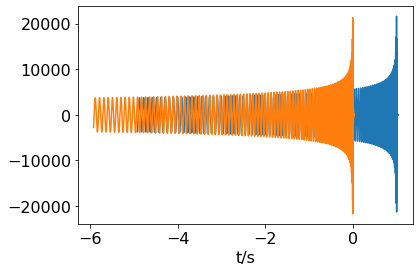

In [25]:
plt.figure()
plt.plot(signal.sample_times, signal.data)
plt.plot(signal_2.sample_times, signal_2.data)
plt.xlabel('t/s')
# plt.xlim(-0.2,0.1)

In [31]:
# shift first time series via time and phase shift to agree with second time series
h1, h2 = matchedfilter.coalign_waveforms(signal, signal_2)

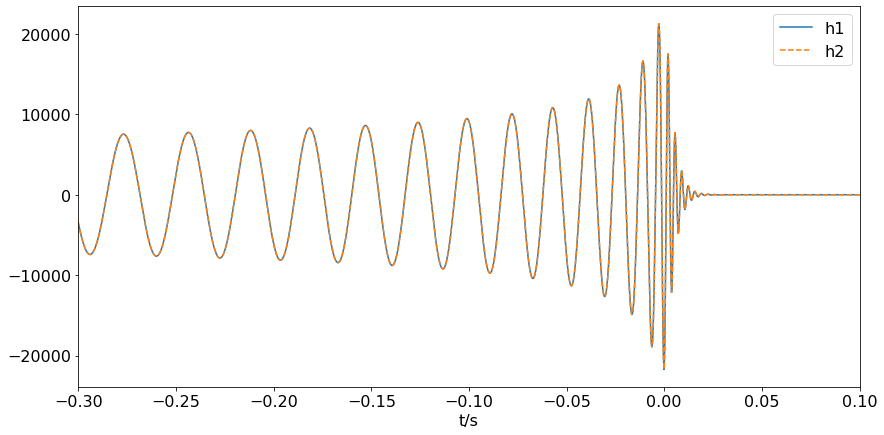

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(h1.sample_times, h1.data, label='h1')
plt.plot(h2.sample_times, h2.data, ls='--', label='h2')
plt.xlabel('t/s')
plt.xlim(-0.3,0.1)
plt.legend()

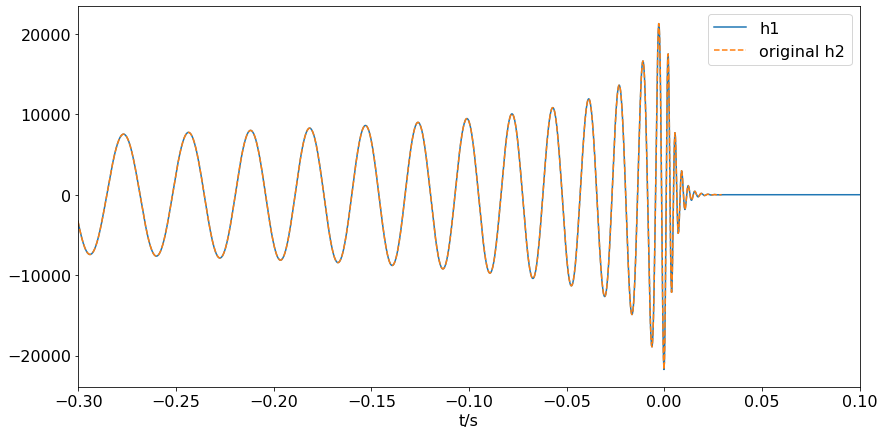

In [41]:
plt.figure(figsize=(14, 7))
plt.plot(h1.sample_times, h1.data, label='h1')
plt.plot(signal_2.sample_times, signal_2.data, ls='--', label='original h2')
plt.xlabel('t/s')
plt.xlim(-0.3,0.1)
plt.legend()